## Lab 7 Math 119A: Time Series with SIR
As in Lab 6 we will be studying the SIR system modeling an epidemic.
$S$ is the number (in millions) of susceptible people, $I$ is the number (in millions) of infectious people, and $R$ is the number (in millions) of recovered and immune people. If we ignore births and deaths, the equations that describe the changes in these populations are:
$$ S'=-a SI/P_0\quad I'=a SI/P_0 - b I\qquad R'=b I$$
We will assume that our total population is $P_0=330$ million people. We start with 100 infected people, $I(0)=0.0001$, $S(0)=P_0-I(0)=329.9999$ million people and $R(0)=0$. (No one has recovered yet.)

We will continue to use the Euler2D program used in Lab 6, and unless otherwise specified we will continue to use $a=1/6$ and $b=1/20$.

In [2]:
def Euler2D(Xprime,Yprime,X0,Y0,t_end,dt):
    Xlist=[X0]          # starts list for X values
    Ylist=[Y0]          # starts list for Tvalues
    X=X0                # initial value for X
    Y=Y0                # initial value for Y
    for t in srange(dt,t_end,dt,include_endpoint=true):  # loops thru time values after tstart
        Xp=Xprime(X,Y)  # gives derivative X' at (X,Y)
        Yp=Yprime(X,Y)  # gives derivative Y' at (X,Y)
        dX=dt*Xp        # computes delta X
        dY=dt*Yp        # computes delta Y
        X=X+dX          # finds new X value
        Y=Y+dY          # finds new Y value
        Xlist.append(X) # apends new X value to Xlist
        Ylist.append(Y) # apends new Y value to Ylist
    XYlist=[Xlist,Ylist]# Combines Xlist and Ylist a list of lists
    return XYlist #returns a list which is made up of the list of X values and the list of Y values

 Now we we are going to create time series plots. Here is an example using Euler2D to create time series plots for our Romeo and Juliet example:

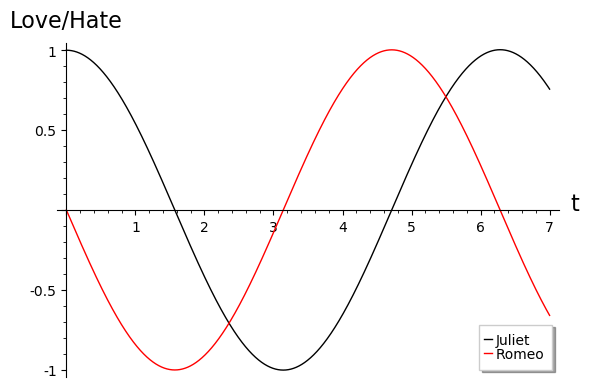

In [3]:
var("J,R")
Jprime(J,R)=R               # formula for J'
Rprime(J,R)=-J              # formula for R'
tend=7.
dt=0.001
JRlist=Euler2D(Jprime,Rprime,1.,0.,tend,dt)
Jvals=JRlist[0]             # extracts the J values from JRlist
Rvals=JRlist[1]             # extracts the R values from JRlist
tvals=srange(0.,tend,dt,include_endpoint=True)     # list of time values
## time series J
pts1=list_plot(list(zip(tvals,Jvals)),plotjoined=True,color='black',legend_label="Juliet")
## time series R
pts2=list_plot(list(zip(tvals,Rvals)),plotjoined=True,color='red',legend_label="Romeo")
## combine the two time series
show(pts1+pts2,axes_labels=["t","Love/Hate"])

**Exercise 1.** Plot the time series for the susceptible population and infected population together on a single graph. (Make sure to include a legend showing which time series goes with which population.)

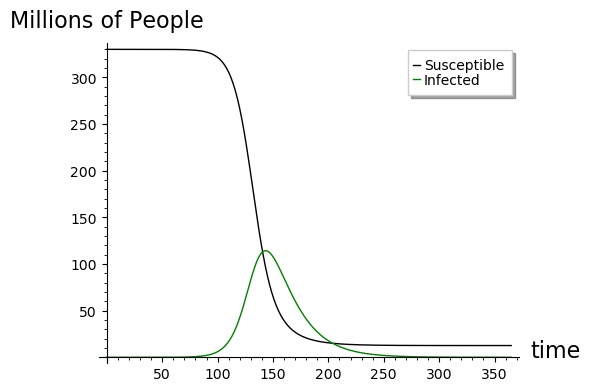

In [7]:
var("S,I") a=1/6. b=1/20. P0=330. I0=.0001 S0=P0-I0 Sprime(S,I)=(-a*S*I)/(P0) Iprime(S,I)=((a*S*I)/(P0)-b*I) tend=365. dt=1. SIlist=Euler2D(Sprime,Iprime,S0,I0,tend,dt) Svals=SIlist[0] Ivals=SIlist[1] tvals=srange(0.,tend,dt,include_endpoint=True) pts3=list_plot(list(zip(tvals, Svals)), plotjoined=True, color="black", legend_label="Susceptible") pts4=list_plot(list(zip(tvals, Ivals)), plotjoined=True, color="green", legend_label="Infected") show(pts3+pts4, axes_labels=["time", "Millions of People"])

**Exercise 2.** Ignore fatalities, so that the number of recovered people $R$ equals $P_0-S-I$. Create the time series of $R$ and graph it along with the time series you've found for $S$ and $I$.

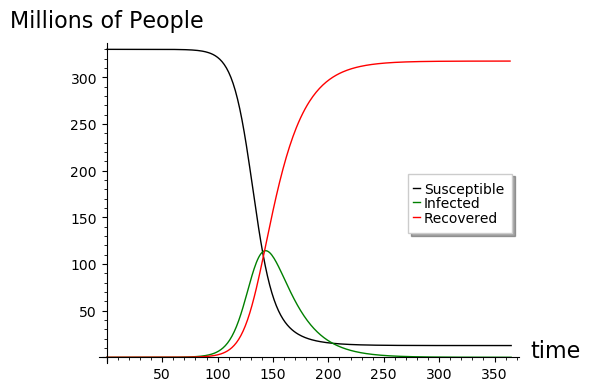

In [8]:
var("S,I") a=1/6. b=1/20. P0=330. I0=.0001 S0=P0-I0 R0=0 Sprime(S,I)=(-a*S*I)/(P0) Iprime(S,I)=((a*S*I)/(P0)-b*I) tend=365. dt=1. SIlist=Euler2D(Sprime,Iprime,S0,I0,tend,dt) Svals=SIlist[0] Ivals=SIlist[1] tvals=srange(0.,tend,dt,include_endpoint=True) Rvals=[] for a in srange(0,365):     Rval=P0-Svals[a]-Ivals[a]     Rvals.append(Rval) pts3=list_plot(list(zip(tvals, Svals)), plotjoined=True, color="black", legend_label="Susceptible") pts4=list_plot(list(zip(tvals, Ivals)), plotjoined=True, color="green", legend_label="Infected") pts5=list_plot(list(zip(tvals, Rvals)), plotjoined=True, color="red", legend_label="Recovered") show(pts3+pts4+pts5, axes_labels=["time", "Millions of People"])

From your plots you should see that the maximum number of infected people at any time is a little more than 100 million. In the next exercise we will give a more accurate estimate for the number of infected people.

**Exercise 3.** Find the maximum number of infected people.

(Hint: In CoCalc the function `max()` allows you to find the maximum of a list. For example `max([4,7,3,-1])` will return 7, the maximum value in the list [4,7,3,-1].)

In [9]:
max(Ivals)

114.195747916283

**Exercise 4.** Across the world people are practicing social distancing in order to decrease the rate at which coronavirus is being spread by decreasing the number of interactions between people. In a comment, identify which parameter in our model is proportional to the average number of interactions between people per day and explain how this variable changes with social distancing.

In [10]:
#Looking at the change equations provided, especially Iprime, we can see a correspondence between S and I values and how that changes the number of infected. In this case, the parameter that could be changed if something such as social distancing was inacted would be the "a" value because the rate of "a" corresponds to the rate at wich S and I interact

**Exercise 5.** From your time series you should see that the peak number of infected people was a little over $100$ million people. Change the variable you identified in the previous exercise so that the peak is near $50$ million.

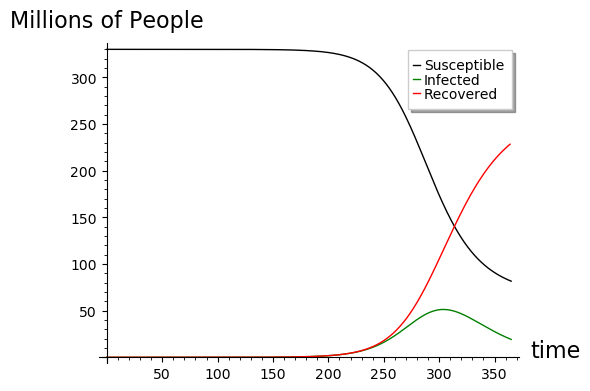

In [11]:
var("S,I") a=1/10. b=1/20. P0=330. I0=.0001 S0=P0-I0 R0=0 Sprime(S,I)=(-a*S*I)/(P0) Iprime(S,I)=((a*S*I)/(P0)-b*I) tend=365. dt=1. SIlist=Euler2D(Sprime,Iprime,S0,I0,tend,dt) Svals=SIlist[0] Ivals=SIlist[1] tvals=srange(0.,tend,dt,include_endpoint=True) Rvals=[] for a in srange(0,365):     Rval=P0-Svals[a]-Ivals[a]     Rvals.append(Rval) pts3=list_plot(list(zip(tvals, Svals)), plotjoined=True, color="black", legend_label="Susceptible") pts4=list_plot(list(zip(tvals, Ivals)), plotjoined=True, color="green", legend_label="Infected") pts5=list_plot(list(zip(tvals, Rvals)), plotjoined=True, color="red", legend_label="Recovered") show(pts3+pts4+pts5, axes_labels=["time", "Millions of People"])

In the next exercise we will need to create an interactive. Here is an example of an interactive with our Romeo and Juliet model:

In [12]:
@interact
def change_c(c=(0,0.5,0.1)):
    var("J,R")
    Jprime(J,R)=R-c*J           # formula for J'
    Rprime(J,R)=-J              # formula for R'
    tend=7.
    dt=0.001
    JRlist=Euler2D(Jprime,Rprime,1,0,tend,dt)
    tvals=srange(0.,tend,dt,include_endpoint=True)       # list of time values
    Jvals=JRlist[0]             # extracts the J values from JRlist
    Rvals=JRlist[1]             # extracts the R values from JRlist
    ## time series J
    pts1=list_plot(list(zip(tvals,Jvals)),plotjoined=True,color='black',legend_label="Juliet")
    ## time series R
    pts2=list_plot(list(zip(tvals,Rvals)),plotjoined=True,color='red',legend_label="Romeo")
    ## combine the two time series
    show(pts1+pts2,axes_labels=["t","Emotion"])

Interactive function <function change_c at 0x7f2ce2040ea0> with 1 widget
  c: FloatSlider(value=0.2, descripti…

In this exercise we will create an interactive allowing us to 'flatten the curve.'

**Exercise 6.** Create an interactive version of your time series with a slider for $a$ which goes from (at most) $1/10=0.1$ to (at least) $1/5=0.2$ in steps (no larger than) $1/100=0.01$.

In [4]:
@interact def change_a(a=(.1,.2,.01)):     var("S,I")     b=1/20.     P0=330.     I0=.0001     S0=P0-I0     Sprime(S,I)=(-a*S*I)/(P0)     Iprime(S,I)=((a*S*I)/(P0)-b*I)     tend=365.     dt=1.     SIlist=Euler2D(Sprime,Iprime,S0,I0,tend,dt)     Svals=SIlist[0]     Ivals=SIlist[1]     tvals=srange(0.,tend,dt,include_endpoint=True)     Rvals=[]     for a in srange(0,365):         Rval=P0-Svals[a]-Ivals[a]         Rvals.append(Rval)     pts3=list_plot(list(zip(tvals, Svals)), plotjoined=True, color="black", legend_label="Susceptible")     pts4=list_plot(list(zip(tvals, Ivals)), plotjoined=True, color="green", legend_label="Infected")     pts5=list_plot(list(zip(tvals, Rvals)), plotjoined=True, color="red", legend_label="Recovered")     show(pts3+pts4+pts5, axes_labels=["time", "Millions of People"])

Interactive function <function change_a at 0x7f2cdd302b70> with 1 widget
  a: FloatSlider(value=0.150000000000…

**Exercise 7.** Create a new version of you interactive which also displays the maximum number of infected people.

(Hint: Use the `text()` function introduced in lab 5., you will probably want to combine tow text() calls, one for a string, "Max =" and the second for actual maximum value. You will want to play with the coordinates where you put the text to get it to look right.)

In [5]:
@interact def change_a(a=(.1,.2,.01)):     var("S,I")     b=1/20.     P0=330.     I0=.0001     S0=P0-I0     Sprime(S,I)=(-a*S*I)/(P0)     Iprime(S,I)=((a*S*I)/(P0)-b*I)     tend=365.     dt=1.     SIlist=Euler2D(Sprime,Iprime,S0,I0,tend,dt)     Svals=SIlist[0]     Ivals=SIlist[1]     tvals=srange(0.,tend,dt,include_endpoint=True)     z=max(Ivals)     Rvals=[]     for a in srange(0,365):         Rval=P0-Svals[a]-Ivals[a]         Rvals.append(Rval)     pts3=list_plot(list(zip(tvals, Svals)), plotjoined=True, color="black", legend_label="Susceptible")     pts4=list_plot(list(zip(tvals, Ivals)), plotjoined=True, color="green", legend_label="Infected")+text(z, [350,365])     pts5=list_plot(list(zip(tvals, Rvals)), plotjoined=True, color="red", legend_label="Recovered")     show(pts3+pts4+pts5, axes_labels=["time", "Millions of People"])

Interactive function <function change_a at 0x7f2cdd34bb70> with 1 widget
  a: FloatSlider(value=0.150000000000…